In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.datasets import ETTh1Dataset
from darts.metrics import mae, mse

In [2]:
# Obtener 50 señales para analizar y predecir

muestreo_corto = 100 # Cada cuantos tiempos tomamos un timepo para entrenar la NODE
muestreo_largo = 1
t_short = np.linspace(0, 0.1, 1000)[0:1000:muestreo_corto]
t_long = np.linspace(0.1, 1, 100)[0:100:muestreo_largo]

time_variable = np.concatenate((t_short,t_long))
file_path = "C:/Users/Propietario/Desktop/ib/Tesis_V1/Proyecto_Tesis/1-GeneracionDeDatos/Datos_Final/datos_PCA/dataSignals.csv"
pd_data = pd.read_csv(file_path)

In [3]:
pd_data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x55091,x55092,x55093,x55094,x55095,x55096,x55097,x55098,x55099,x55100
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999997,0.999997,0.999997,0.999997,0.999997,0.999997,0.999997,0.999997,0.999997,0.999997,...,0.999995,0.999995,0.999995,0.999995,0.999995,0.999995,0.999995,0.999995,0.999995,0.999996
2,0.999979,0.999979,0.999979,0.999979,0.999979,0.999979,0.999979,0.999979,0.999979,0.999979,...,0.999964,0.999964,0.999964,0.999964,0.999964,0.999964,0.999964,0.999964,0.999964,0.999964
3,0.999945,0.999945,0.999945,0.999945,0.999945,0.999945,0.999945,0.999945,0.999945,0.999945,...,0.999880,0.999880,0.999880,0.999880,0.999881,0.999881,0.999881,0.999881,0.999881,0.999881
4,0.999897,0.999897,0.999897,0.999897,0.999897,0.999897,0.999897,0.999897,0.999897,0.999896,...,0.999718,0.999718,0.999719,0.999719,0.999719,0.999719,0.999720,0.999720,0.999720,0.999721


In [4]:
column_names = [f'x{i}' for i in range(1,55101)]
datos = pd_data[column_names].to_numpy().transpose()

In [5]:
print("Size of data:", datos.shape)
# Usar 50 señales
datos_utilizados = datos[99:10000:200,:]
# Usar 1 señal
# datos_utilizados = datos[50,:]
print("Size of data used:", datos_utilizados.shape)

# Cambiamos el tamaño de los datos para hacerlos mas chicos y poder trabajar con ellos

datos_short = datos_utilizados[:,0:1001:muestreo_corto]
datos_long = datos_utilizados[:,1001::muestreo_largo]

datos_utilizados = np.concatenate((datos_short,datos_long), axis = 1).transpose()
print("Actual size of data used:", datos_utilizados.shape)

Size of data: (55100, 1100)
Size of data used: (50, 1100)
Actual size of data used: (110, 50)


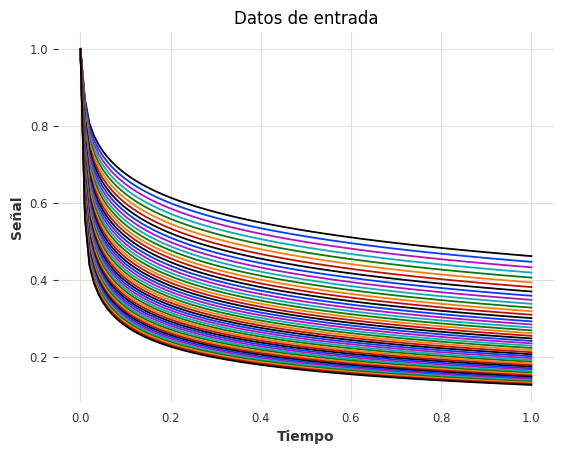

In [6]:
# Veamos como se ven los datos
for i in range(50):
    plt.plot(time_variable, datos_utilizados[:,i])
plt.title('Datos de entrada')
plt.xlabel('Tiempo')
plt.ylabel('Señal')
plt.show()

In [15]:
print("Time variable shape:", time_variable.shape)
print("Used data shape: ", datos_utilizados.shape)

Time variable shape: (110,)
Used data shape:  (110, 50)


In [ ]:
series = TimeSeries.from_values(datos_utilizados)
times = np.reshape(time_variable, (len(datos_utilizados),1))

In [14]:
train, test = series[:-60], series[-60:]
times_train, times_test = times[:-60], times[-60:]

In [16]:
print("Longitud de datos entrenamiento:",len(train))
print("Longitud de datos prueba:",len(test))

Longitud de datos entrenamiento: 50
Longitud de datos prueba: 60


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


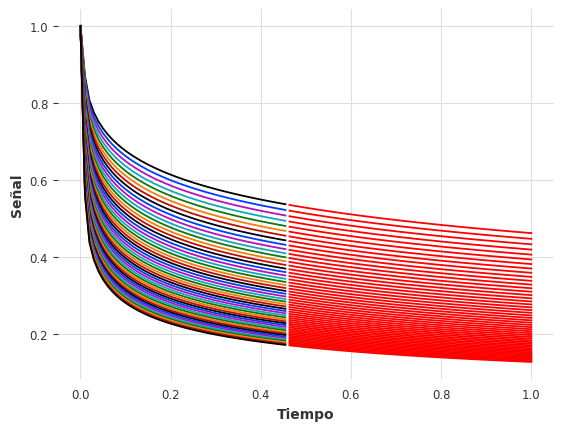

In [17]:
# Veamos como se ven los datos
plt.plot(times_train, train.values())
plt.plot(times_test, test.values(), color='red')
plt.xlabel('Tiempo')
plt.ylabel('Señal')
plt.legend()
plt.show()

In [18]:
from darts.models.forecasting.tide_model import TiDEModel
from darts.dataprocessing.transformers import Scaler

# train_scaler = Scaler()
# scaled_train = train_scaler.fit_transform(train)

tide = TiDEModel(
    input_chunk_length=49, 
    output_chunk_length=1,
    num_encoder_layers=4,
    num_decoder_layers=4,
    decoder_output_dim=32,
    hidden_size=512,
    temporal_decoder_hidden=16,
    use_layer_norm=True,
    dropout=0.1,
    random_state=42)

tide.fit(
    train,
    epochs=3000,
)

c:\Users\Propietario\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name             | Type             | Params
------------------------------------------------------
0 | criterion        | MSELoss          | 0     
1 | train_metrics    | MetricCollection | 0     
2 | val_metrics      | MetricCollection | 0     
3 | encoders         | Sequential       | 5.1 M 
4 | decoders         | Sequential       | 2.7 M 
5 | temporal_decoder | _ResidualBlock   | 3.1 K 
6 | lookback_skip    | Linear           | 50    
------------------------------------------------------
7.8 M     Trainable params
0         Non-trainable params
7.8 M   

Epoch 2999: 100%|██████████| 1/1 [00:00<00:00, 12.23it/s, train_loss=2.49e-6]

`Trainer.fit` stopped: `max_epochs=3000` reached.


Epoch 2999: 100%|██████████| 1/1 [00:00<00:00, 10.27it/s, train_loss=2.49e-6]


TiDEModel(num_encoder_layers=4, num_decoder_layers=4, decoder_output_dim=32, hidden_size=512, temporal_width_past=4, temporal_width_future=4, temporal_decoder_hidden=16, use_layer_norm=True, dropout=0.1, use_static_covariates=True, input_chunk_length=49, output_chunk_length=1, random_state=42)

In [19]:
pred_tide = tide.predict(n=60)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]


In [20]:
preds_df = pred_tide.pd_dataframe()
test_df = test.pd_dataframe()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


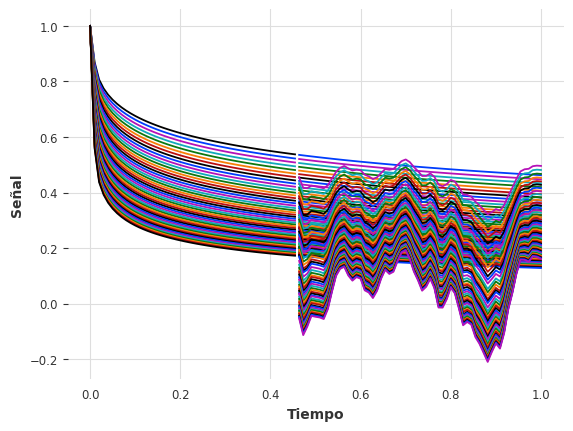

In [21]:
plt.plot(times_train, train.values())
plt.plot(times_test, test.values())
plt.plot(times_test, preds_df)
plt.xlabel('Tiempo')
plt.ylabel('Señal')
plt.legend()
plt.show()

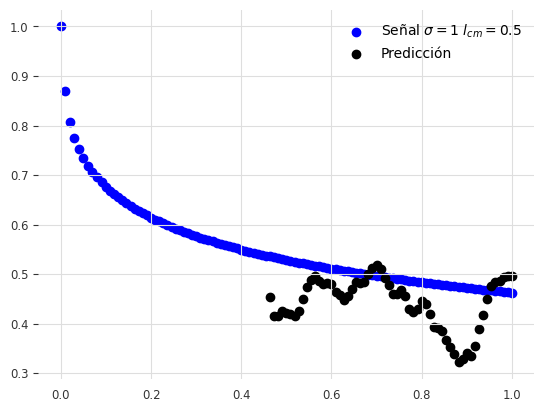

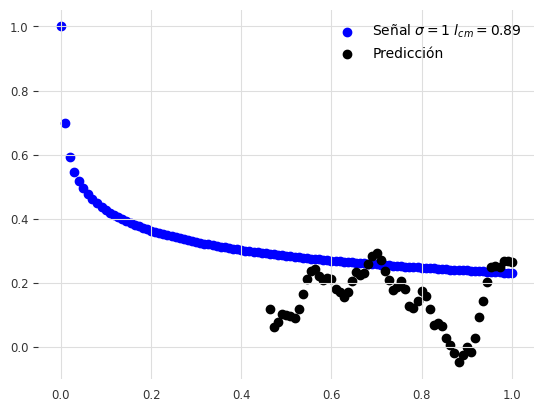

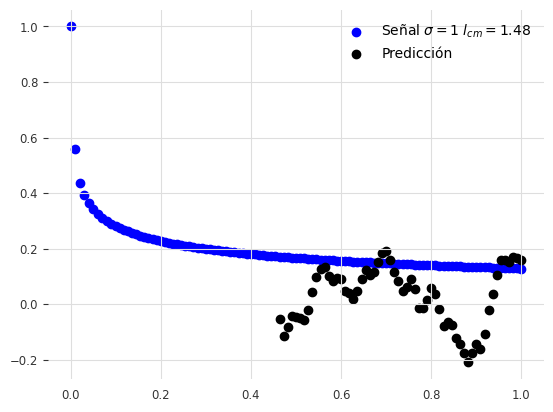

In [24]:
plt.scatter(times_train, train.values()[:,0], label=r'Señal $\sigma = 1$ $l_{cm} = 0.5$', color = 'blue')
plt.scatter(times_test, test.values()[:,0], label=None, color = 'blue')
plt.scatter(times_test, pred_tide.values()[:,0], label='Predicción')
plt.legend()
plt.savefig("TiDE_signal1.png")
plt.show()

plt.scatter(times_train, train.values()[:,24], label=r'Señal $\sigma = 1$ $l_{cm} = 0.89$', color = 'blue')
plt.scatter(times_test, test.values()[:,24], label=None, color = 'blue')
plt.scatter(times_test, pred_tide.values()[:,24], label='Predicción')
plt.legend()
plt.savefig("TiDE_signal2.png")
plt.show()

plt.scatter(times_train, train.values()[:,49], label=r'Señal $\sigma = 1$ $l_{cm} = 1.48$', color = 'blue')
plt.scatter(times_test, test.values()[:,49], label=None, color = 'blue')
plt.scatter(times_test, pred_tide.values()[:,49], label='Predicción')
plt.legend()
plt.savefig("TiDE_signal3.png")
plt.show()


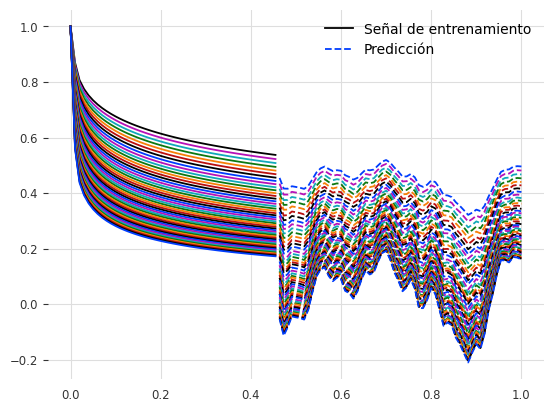

In [25]:
plt.plot(times_train, train.values()[:,0], label='Señal de entrenamiento')
plt.plot(times_test, pred_tide.values()[:,0], label='Predicción', linestyle = '--')
plt.plot(times_train, train.values()[:,1:], label=None)
plt.plot(times_test, pred_tide.values()[:,1:], label=None, linestyle = '--')
plt.legend()
plt.savefig("TiDESignals_Forecast.png")
plt.show()

In [98]:
tide_mae = mae(test, pred_tide)
tide_mse = mse(test, pred_tide)

print(tide_mae, tide_mse)

0.03177408014408585 0.001320879673423702


In [59]:
times = np.reshape(time_variable, (len(datos_utilizados)))
times.shape
datos_utilizados_1signal = datos_utilizados[:,0]

In [60]:
series_1signal = TimeSeries.from_values(datos_utilizados_1signal)

In [88]:
train, test = series_1signal[:-60], series_1signal[-60:]
times_train, times_test = times[:-60], times[-60:]

In [89]:
tide_1signal = TiDEModel(
    input_chunk_length=49, 
    output_chunk_length=1,
    num_encoder_layers=4,
    num_decoder_layers=4,
    decoder_output_dim=32,
    hidden_size=512,
    temporal_decoder_hidden=16,
    use_layer_norm=True,
    dropout=0.1,
    random_state=42)

tide_1signal.fit(
    train,
    epochs=1000,
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



  | Name             | Type             | Params
------------------------------------------------------
0 | criterion        | MSELoss          | 0     
1 | train_metrics    | MetricCollection | 0     
2 | val_metrics      | MetricCollection | 0     
3 | encoders         | Sequential       | 2.7 M 
4 | decoders         | Sequential       | 2.7 M 
5 | temporal_decoder | _ResidualBlock   | 580   
6 | lookback_skip    | Linear           | 50    
------------------------------------------------------
5.3 M     Trainable params
0         Non-trainable params
5.3 M     Total params
21.380    Total estimated model params size (MB)


Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 15.06it/s, train_loss=0.000]   

`Trainer.fit` stopped: `max_epochs=1000` reached.


Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 14.96it/s, train_loss=0.000]


TiDEModel(num_encoder_layers=4, num_decoder_layers=4, decoder_output_dim=32, hidden_size=512, temporal_width_past=4, temporal_width_future=4, temporal_decoder_hidden=16, use_layer_norm=True, dropout=0.1, use_static_covariates=True, input_chunk_length=49, output_chunk_length=1, random_state=42)

In [90]:
pred_series = tide_1signal.predict(n=60)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]


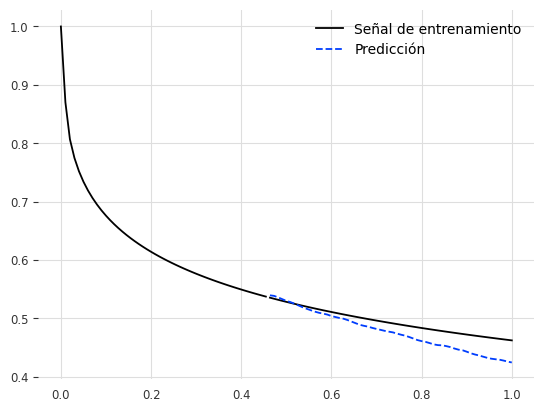

In [92]:
plt.plot(times_train, train.values(), label='Señal de entrenamiento')
plt.plot(times_test, test.values(), label=None, color = 'black')
plt.plot(times_test, pred_series.values(), label='Predicción', linestyle = '--')
plt.legend()
plt.savefig("TiDE_1signal.png")